## Author: Devashish Mahajan
## kaggle Account : https://www.kaggle.com/devashishmahajan

## PySpark, MLLib

### Dataset: https://www.kaggle.com/competitions/titanic/data

# ML

### MLLib 
MLLib supports the use of spark dataframe for building the machine learning pipelines.

### Why PySpark?
Lets have a look at the run times of various dataframes.

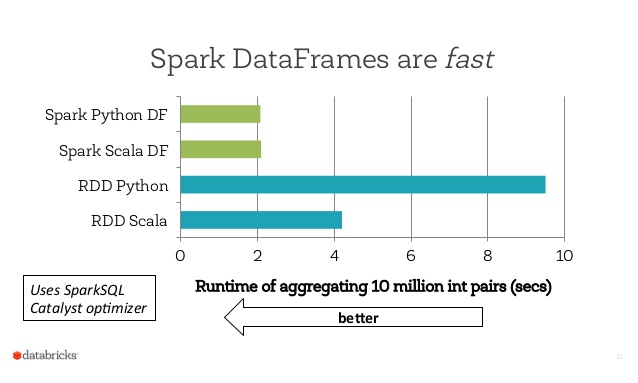

#### Advantage
Apart from the fast performance of spark dataframes, python has many machine learning libraries including Scikit learn, matplotlib ,seaborn etc

In this exercise, will go through the building of a machine learning pipeline with MLlib for classification purpose. 
The exercise includes:

1. Loading the data into Spark dataframe
2. Preprocessing the raw data
3. Feature extraction/transformation
4. Training classification model
5. Model Evaluation
6. Hyperparameters tuning and cross validation

### Classification model

1. Logistic Regression
2. Decision tree classifier
3. Random Forest
4. Gradient boosted tree classifier
5. SVM

In [1]:
# imports necessary modules
import os
import sys

# pip install findspark
import findspark
import pyspark


from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

findspark.init()
findspark.find()

# let us initialise the spark session
spark = SparkSession.builder.appName("pyspark ML").config("config_option","value").getOrCreate()

## Loading the data into Spark dataframe
## Titanic Dataset

In [2]:
df = (spark.read.format("csv").option("header","true").load("train.csv"))

In [3]:
df.show(5) 

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

In [4]:
#view as pandas dataframe
df.limit(5).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S


### Check some information about data

In [5]:
# no of rows
df.count() 

891

In [6]:
# column names
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
# no of columns
len(df.columns)

12

In [8]:
# statistics (count, mean, stddev, min, max)
df.describe().toPandas()

,summary,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,count,891,891,891,891,891,714,891,891,891,891,204,889
1,mean,446.0,0.3838383838383838,2.308641975308642,None,None,29.69911764705882,0.5230078563411896,0.38159371492704824,260318.54916792738,32.2042079685746,None,None
2,stddev,257.3538420152301,0.48659245426485753,0.8360712409770491,None,None,14.526497332334035,1.1027434322934315,0.8060572211299488,471609.26868834975,49.69342859718089,None,None
3,min,1,0,1,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",female,0.42,0,0,110152,0,A10,C
4,max,99,1,3,"van Melkebeke, Mr. Philemon",male,9,8,6,WE/P 5735,93.5,T,S


In [9]:
#datatypes
df.dtypes

[('PassengerId', 'string'),
 ('Survived', 'string'),
 ('Pclass', 'string'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'string'),
 ('SibSp', 'string'),
 ('Parch', 'string'),
 ('Ticket', 'string'),
 ('Fare', 'string'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

### Data preparation and feature engineering and feature selection

In [10]:
# casting numeric columns
# feature selection

from pyspark.sql.functions import col

dataset = df.select(col("Survived").cast("float"),
                   col("Pclass").cast("float"),
                   col("Sex"),
                   col("Age").cast("float"),
                   col("Fare").cast("float"),
                    col("Embarked"))

dataset.show(4)

+--------+------+------+----+-------+--------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|
+--------+------+------+----+-------+--------+
|     0.0|   3.0|  male|22.0|   7.25|       S|
|     1.0|   1.0|female|38.0|71.2833|       C|
|     1.0|   3.0|female|26.0|  7.925|       S|
|     1.0|   1.0|female|35.0|   53.1|       S|
+--------+------+------+----+-------+--------+
only showing top 4 rows



In [11]:
# check the null values / missing values in data
from pyspark.sql.functions import isnull, when, count

dataset.select([count(when(isnull(c),c)).alias(c) for c in dataset.columns]).show()

+--------+------+---+---+----+--------+
|Survived|Pclass|Sex|Age|Fare|Embarked|
+--------+------+---+---+----+--------+
|       0|     0|  0|177|   0|       2|
+--------+------+---+---+----+--------+



In [12]:
dataset.select([count(when(isnull(col1),col1)).alias(col1) for col1 in dataset.columns]).show()

+--------+------+---+---+----+--------+
|Survived|Pclass|Sex|Age|Fare|Embarked|
+--------+------+---+---+----+--------+
|       0|     0|  0|177|   0|       2|
+--------+------+---+---+----+--------+



In [13]:
dataset.count()

891

#### Imputing the null values


In [14]:
# Imputing the null values
df = dataset.select("Embarked")

df=df.na.fill(value="S")

# to check whether null values are replaced or not
df.select([count(when(isnull(col1),col1)).alias(col1) for col1 in df.columns]).show()

+--------+
|Embarked|
+--------+
|       0|
+--------+



#### Drop the null values

In [15]:
dataset = dataset.replace("null",None).dropna(how = "any") 

In [16]:
# to check
dataset.select([count(when(isnull(col1),col1)).alias(col1) for col1 in dataset.columns]).show()
# hence can see there are no null values

+--------+------+---+---+----+--------+
|Survived|Pclass|Sex|Age|Fare|Embarked|
+--------+------+---+---+----+--------+
|       0|     0|  0|  0|   0|       0|
+--------+------+---+---+----+--------+



#### Categorical columns into numerical columns

In [17]:
dataset.show(3)

+--------+------+------+----+-------+--------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|
+--------+------+------+----+-------+--------+
|     0.0|   3.0|  male|22.0|   7.25|       S|
|     1.0|   1.0|female|38.0|71.2833|       C|
|     1.0|   3.0|female|26.0|  7.925|       S|
+--------+------+------+----+-------+--------+
only showing top 3 rows



In [18]:
from pyspark.ml.feature import StringIndexer

# for sex column
dataset = StringIndexer(inputCol = "Sex",
                       outputCol = "Gender",
                       handleInvalid = "keep").fit(dataset).transform(dataset)
# for Embarked column
dataset = StringIndexer(inputCol = "Embarked",
                       outputCol = "Boarded",
                       handleInvalid = "keep").fit(dataset).transform(dataset)

In [19]:
dataset.show(2)

+--------+------+------+----+-------+--------+------+-------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|Gender|Boarded|
+--------+------+------+----+-------+--------+------+-------+
|     0.0|   3.0|  male|22.0|   7.25|       S|   0.0|    0.0|
|     1.0|   1.0|female|38.0|71.2833|       C|   1.0|    1.0|
+--------+------+------+----+-------+--------+------+-------+
only showing top 2 rows



In [20]:
# drop unnecessary columns such as sex and embarked

dataset = dataset.drop("Sex","Embarked")

In [21]:
dataset.show(2)

+--------+------+----+-------+------+-------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|
+--------+------+----+-------+------+-------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|
|     1.0|   1.0|38.0|71.2833|   1.0|    1.0|
+--------+------+----+-------+------+-------+
only showing top 2 rows



In [22]:
dataset.columns

['Survived', 'Pclass', 'Age', 'Fare', 'Gender', 'Boarded']

In [23]:
# assembling all the features with VectorAssembler

required_features = ['Pclass', 'Age', 'Fare', 'Gender', 'Boarded']

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = required_features, outputCol="features")

transformed_data = assembler.transform(dataset)

In [24]:
transformed_data.show(3)

+--------+------+----+-------+------+-------+--------------------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|            features|
+--------+------+----+-------+------+-------+--------------------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|[3.0,22.0,7.25,0....|
|     1.0|   1.0|38.0|71.2833|   1.0|    1.0|[1.0,38.0,71.2833...|
|     1.0|   3.0|26.0|  7.925|   1.0|    0.0|[3.0,26.0,7.92500...|
+--------+------+----+-------+------+-------+--------------------+
only showing top 3 rows



### Split the data

In [25]:
# for random forest
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [26]:
# define the model
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol = "Survived",
                           featuresCol ="features" ,
                           maxDepth = 5)

In [27]:
# fit the model
model = rf.fit(training_data)

In [28]:
# predict on test dataset
predictions = model.transform(test_data)

In [29]:
# evaluate our model

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol = "Survived",
                                             predictionCol = "prediction",
                                             metricName ="accuracy")

In [30]:
# checking Accuracy
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy ", accuracy )

Test Accuracy  0.859375
